#### Figure 1 A, B, C

We require `pandas` and `numpy` to read and process the information in an Excel file. For generating plots, we will use `seaborn`,`matplotlib`, and from the `matplotlib_venn` library we use `venn2`. 

> [1] Gavriilidou, A., Kautsar, S.A., Zaburannyi, N. et al. Compendium of specialized metabolite biosynthetic diversity encoded in bacterial genomes. Nat Microbiol 7, 726–735 (2022). (https://doi.org/10.1038/s41564-022-01110-2)

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

### Reading data

In [2]:
table_1_A = pd.read_excel("Table_1.xlsx", sheet_name="Fig1 panel a", header=None)
table_1_B = pd.read_excel("Table_1.xlsx", sheet_name="Fig1 panel b", header=None)
table_1_C = pd.read_excel("Table_1.xlsx", sheet_name="Fig1 panel c", header=None)

In [3]:
table_1_A.columns = table_1_A.iloc[1].values

df = table_1_A.drop([0,1])
df = df.reset_index(drop=True)


df2 = df.copy()
df2 = df2[["genus","t=0.4"]]
df2 = df2.assign(thresh=["t=0.4" for str_tt in range(len(df2))])
df2 = df2.rename({"genus": "Genus", "t=0.4": "Number of GCFs", "thresh": "Threshold (T)"}, axis='columns')


newdf = pd.concat([df2,df2,df2,df2])
newdf = newdf.reset_index(drop=True)


for i in range(1,4):
    newdf.loc[i*9:((i+1)*9)-1,["Number of GCFs"]] = df[df.columns[i+1]].values.reshape((-1,1))
    newdf.loc[i*9:((i+1)*9)-1,["Threshold (T)"]] = np.array([df.columns[i+1]]*9).reshape((-1,1))

### Ploting 1st figure, FIGURE 1 A

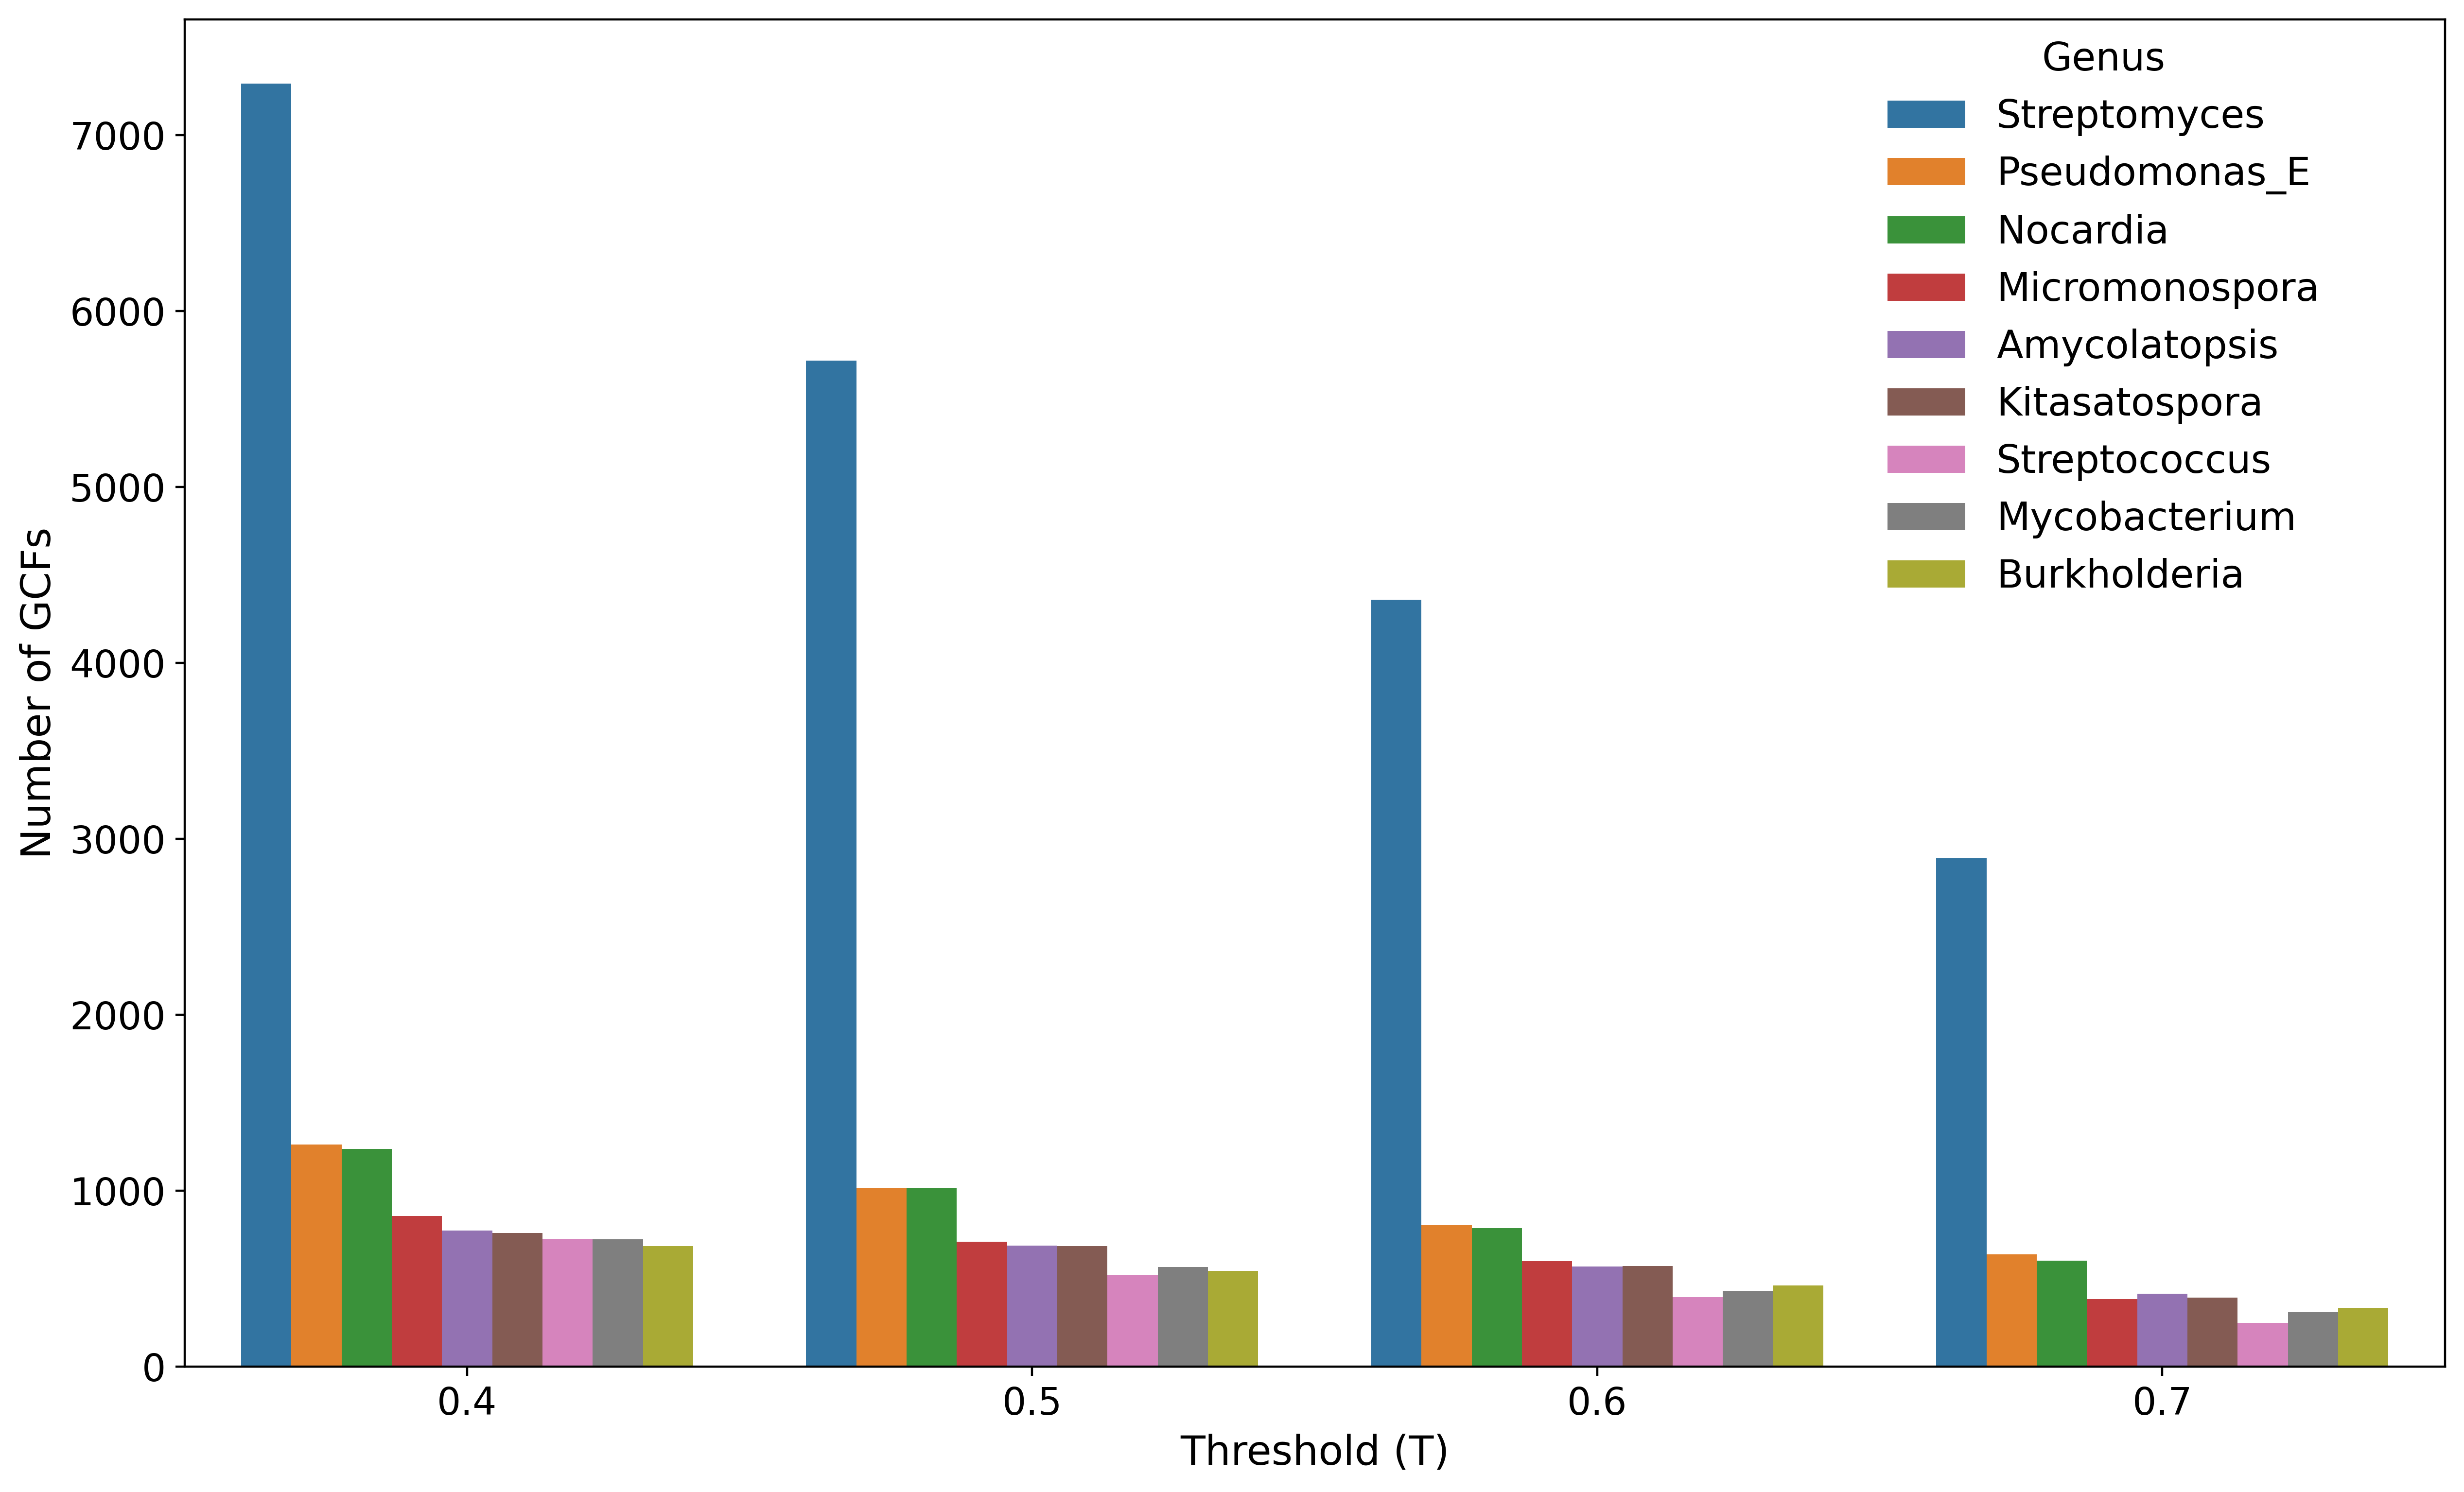

In [4]:
plt.figure(figsize=(15,9), dpi=400)

g = sns.barplot(data=newdf, x="Threshold (T)", y="Number of GCFs", hue="Genus")

sns.move_legend(g, "upper right", bbox_to_anchor=(.96, 1.01), frameon=False, fontsize="x-large", title_fontsize="x-large")

# g.axes.set_title("Figure_1_A_Reproduced_Topic_10",fontsize=10)

g.set_xlabel("Threshold (T)", fontsize=15)
g.set_ylabel("Number of GCFs", fontsize=15)

g.xaxis.set_ticks(["t=0.4", "t=0.5", "t=0.6", "t=0.7"])

g.set_xticklabels(["0.4", "0.5", "0.6", "0.7"])

g.yaxis.set_ticks(["0", "1000", "2000", "3000", "4000", "5000", "6000", "7000"])

g.set_yticklabels(["0", "1,000", "2,000", "3,000", "4,000", "5,000", "6,000", "7000"])

g.tick_params(labelsize=14)

plt.show()

g.figure.savefig('Figures_1_Original_Format/output_figure_1_A_Topic_10.png', dpi=400)

### Reading data

In [5]:
table_1_B.columns = table_1_B.loc[0]
table_1_B = table_1_B.drop(0).reset_index(drop=True)
table_1_B_metadata = table_1_B[table_1_B.label == "NPAtlas chemical classes"]
table_1_B  = table_1_B.drop(0).drop("Note",axis=1).reset_index(drop=True)

In [6]:
bigslice_mags_data = table_1_B[table_1_B.label == "BiG-SLiCE RefSeq + MAGs"]
bigslice_refseq_data = table_1_B[table_1_B.label == "BiG-SLiCE RefSeq"]
clustomatic_data = table_1_B[table_1_B.label == "clust-o-matic RefSeq"]

### Ploting 2nd figure, FIGURE 1 B

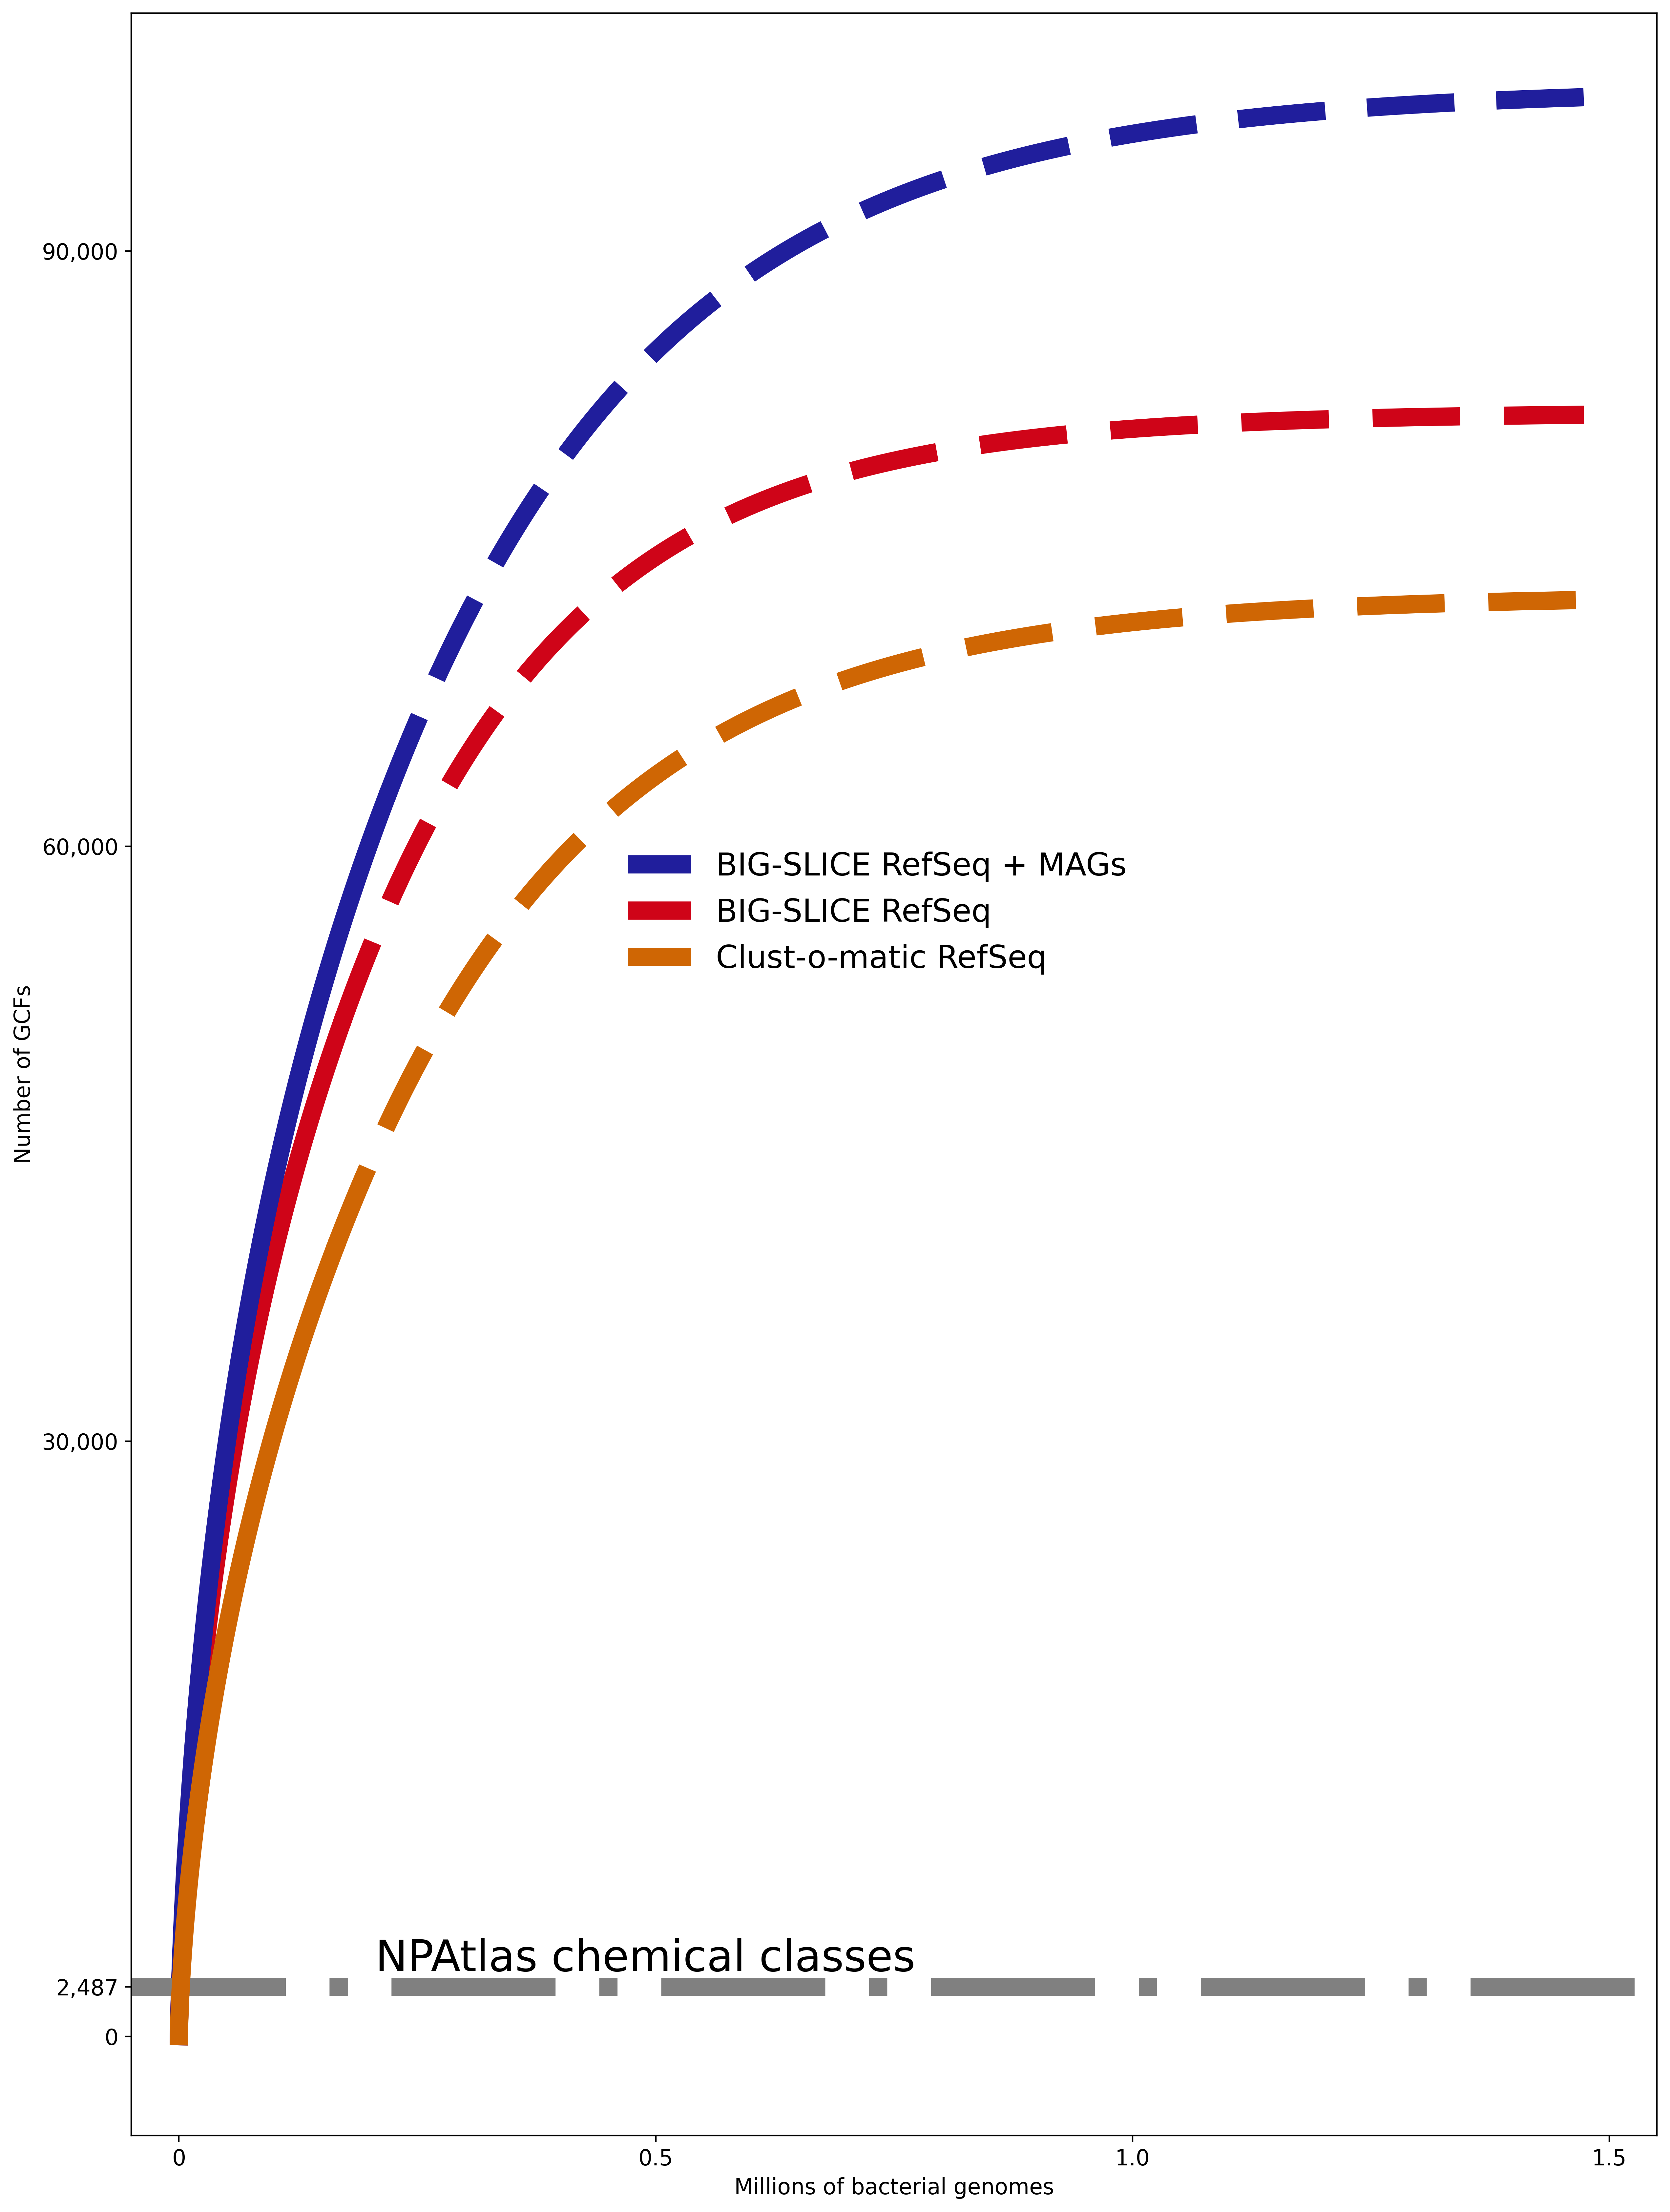

In [7]:
plt.figure(figsize=(15,21), dpi=400)


g3 = sns.lineplot(x=bigslice_mags_data["Number of genomes"][999:]/1000000, 
                  y=bigslice_mags_data["Number of GCFs"][999:], 
                  label="BiG-SLiCE RefSeq + MAGs",
                  linestyle=(0, (4.8, 2.3)),
                  lw=10,
                  color="#201e9c")

g4 = sns.lineplot(x=bigslice_refseq_data["Number of genomes"][999:]/1000000,
                  y=bigslice_refseq_data["Number of GCFs"][999:], 
                  label="BiG-SLiCE RefSeq",
                  linestyle=(0, (4.8, 2.4)),
                  lw=10,
                  color="#cf0418")


g6 = sns.lineplot(x=clustomatic_data["Number of genomes"][999:]/1000000,
                  y= clustomatic_data["Number of GCFs"][999:], 
                  label="Clust-o-matic RefSeq",
                  linestyle=(0, (4.8, 2.4)),
                  lw=10,
                  color="#cf6604");



g1 = sns.lineplot(x=bigslice_refseq_data["Number of genomes"][:999]/1000000, 
                  y=bigslice_refseq_data["Number of GCFs"][:999], 
                  label=None,
                  lw=10,
                  color="#cf0418")

g0 = sns.lineplot(x=bigslice_mags_data["Number of genomes"][:999]/1000000,
                 y=bigslice_mags_data["Number of GCFs"][:999],
                 label=None,
                 lw=10,
                 color="#201e9c"
                )

g5 = sns.lineplot(x=[-0.06, 1.527],
                  y=2487, 
                  label=None, 
                  linestyle=(0, (9, 2.4, 1, 2.4)),
                  lw=10,
                  color="gray");

g = sns.lineplot(x=clustomatic_data["Number of genomes"][:999]/1000000,
                  y=clustomatic_data["Number of GCFs"][:999], 
                  label=None,
                  lw=10,
                  color="#cf6604")


sns.move_legend(g6, "center", bbox_to_anchor=(.489, .576), frameon=False, fontsize="xx-large")

# g.axes.set_title("Figure_1_B_Reproduced_Topic_10", fontsize=9)

g.set_xlabel("Millions of bacterial genomes",fontsize=12)
g.set_ylabel("Number of GCFs",fontsize=12)


g.set_xlim([-0.05, 1.55])
g.set_ylim([-5000, 102000])

g.set_xticks([0, 0.5, 1.0, 1.5])
g.set_yticks([0, 2487, 30000, 60000, 90000])

g.text(0.489, 3887, "NPAtlas chemical classes", ha="center", va="center", fontsize=23.7)

g.set_xticklabels(["0", "0.5", "1.0","1.5"]) 
g.set_yticklabels(["0", "2,487", "30,000","60,000","90,000"]) 

g.tick_params(labelsize=12)

plt.show()

g.figure.savefig('Figures_1_Original_Format/output_figure_1_B_Topic_10.png', dpi=400)

### Reading data

In [8]:
table_1_C.columns = table_1_C.loc[0]
table_1_C = table_1_C.drop(0).reset_index(drop=True)

### Ploting 3rd figure, FIGURE 1 C

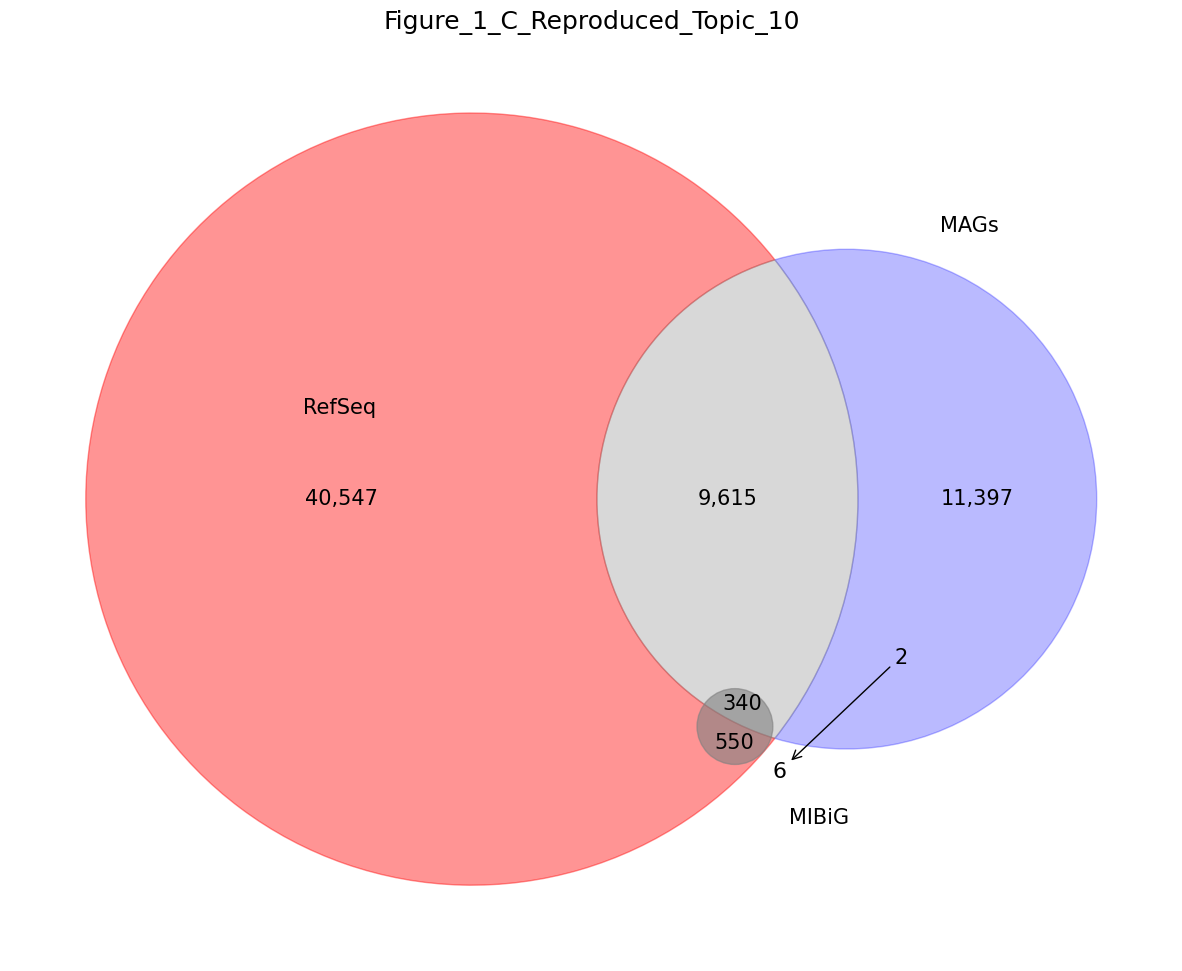

In [9]:
center = (0.201, -0.3)
radius = 0.05

circle = plt.Circle(xy=center, radius=radius, color='gray', fill=True,alpha=0.6)

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)


v = venn2(subsets = (40547, 11397, 9615), set_labels = ('A', 'B', 'C'))

plt.text(-0.321, 0.12, "RefSeq", ha="center", va="center", fontsize=15)

v.get_patch_by_id('A').set_alpha(0.42)
v.get_patch_by_id('A').set_color('red')
v.get_label_by_id('A').set_text(None)
v.get_label_by_id('10').set_text('40,547')

v.get_patch_by_id('B').set_alpha(0.27)
v.get_patch_by_id('B').set_color('blue')
v.get_label_by_id('B').set_text(None)
v.get_label_by_id('01').set_text('11,397')

v.get_patch_by_id('C').set_alpha(0.3)
v.get_patch_by_id('C').set_color('gray')
v.get_label_by_id('11').set_text('9,615')

for text in v.subset_labels:
    text.set_fontsize(15)

ax.add_patch(circle)

plt.text(0.2, -0.321, "550", ha="center", va="center", fontsize=15);

plt.text(0.21, -0.27, "340", ha="center", va="center", fontsize=15)

plt.text(0.42, -0.21, "2", ha="center", va="center", fontsize=15);

plt.text(0.51, 0.36, "MAGs", ha="center", va="center", fontsize=15)

plt.text(0.312, -0.42, "MIBiG", ha="center", va="center", fontsize=15)

# plt.title("Figure_1_C_Reproduced_Topic_10", fontsize=18)

plt.annotate('6', xy=(0.408, -0.219), xytext=(-81,-81),
             ha='center', textcoords='offset points',
             arrowprops=dict(arrowstyle='<-'),fontsize=15.9);

fig.savefig('Figures_1_Original_Format/output_figure_1_C_Topic_10.png', dpi=400)

### END OF FIGURE 1